In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# read data file
url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/kid_calories.csv'

data = pd.read_csv(url)

print(data)

           group  calories
0      kid_cooks    435.16
1      kid_cooks    338.99
2      kid_cooks    488.73
3      kid_cooks    590.28
4      kid_cooks    582.59
5      kid_cooks    635.21
6      kid_cooks    249.86
7      kid_cooks    441.66
8      kid_cooks    572.43
9      kid_cooks    357.78
10     kid_cooks    396.79
11     kid_cooks    298.38
12     kid_cooks    282.99
13     kid_cooks    368.51
14     kid_cooks    388.59
15     kid_cooks    256.32
16     kid_cooks    408.82
17     kid_cooks    424.94
18     kid_cooks    477.96
19     kid_cooks    428.74
20     kid_cooks    432.52
21     kid_cooks    428.27
22     kid_cooks    596.79
23     kid_cooks    456.30
24     kid_cooks    446.38
25  parent_cooks    414.61
26  parent_cooks    503.46
27  parent_cooks    425.22
28  parent_cooks    288.77
29  parent_cooks    184.00
30  parent_cooks    299.73
31  parent_cooks    350.65
32  parent_cooks    394.94
33  parent_cooks    261.55
34  parent_cooks    295.28
35  parent_cooks    139.69
3

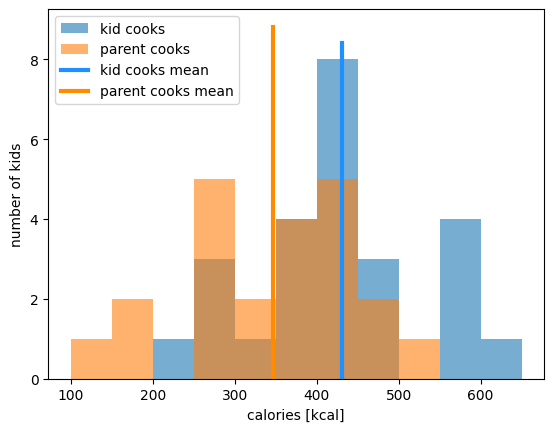

In [ ]:
# show data

group_names = np.unique(data.group)
group1 = data.calories[data.group == group_names[0]]
group2 = data.calories[data.group == group_names[1]]

group1_mean = group1.mean()
group2_mean = group2.mean()

bin_edges = np.arange(100,700,50)
plt.hist(group1,bins = bin_edges, alpha = 0.6, label = 'kid cooks')
plt.hist(group2, bins = bin_edges, alpha = 0.6, label = 'parent cooks')
plt.plot([group1_mean,group1_mean],plt.gca().get_ylim(),color = 'dodgerblue', 
         lw = 3, label = 'kid cooks mean')
plt.plot([group2_mean,group2_mean],plt.gca().get_ylim(),color = 'darkorange', 
         lw=3,  label = 'parent cooks mean')
plt.xlabel('calories [kcal]'), plt.ylabel('number of kids')
plt.legend(loc = 'upper left')
plt.show()

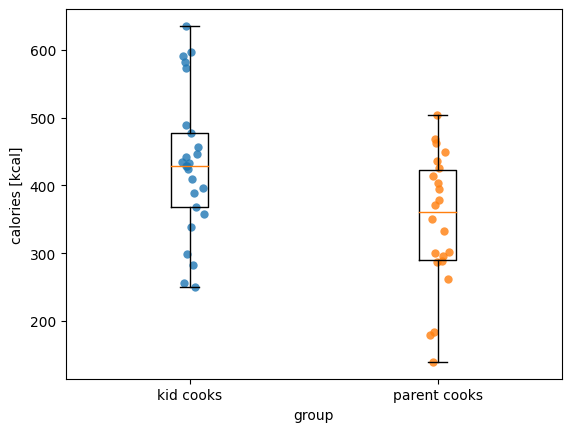

In [ ]:
# boxplot

plt.boxplot([group1, group2] , positions = np.array((1,2)) )

x_noise1 = np.random.normal(1,0.02,size = (len(group1),))
x_noise2 = np.random.normal(2,0.02,size = (len(group2),))

plt.scatter(x_noise1 , group1 , linewidths = 0, alpha = 0.8)
plt.scatter(x_noise2 , group2 , linewidths = 0, alpha = 0.8)

plt.xticks((1,2) , ('kid cooks' , 'parent cooks'))
plt.xlabel('group'), plt.ylabel('calories [kcal]')
plt.show()

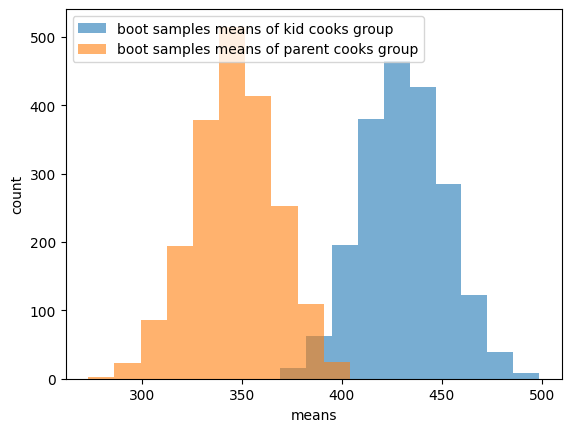

In [ ]:
# non-parametric bootstrap nonpaired

num_boots = 2000
boot_samples1 = np.random.choice(group1, size = (len(group1),num_boots))
boot_samples2 = np.random.choice(group2, size = (len(group2),num_boots))

boot_samples1_means = boot_samples1.mean(axis = 0)
boot_samples2_means = boot_samples2.mean(axis = 0)

plt.hist(boot_samples1_means, alpha = 0.6, label = 'boot samples means of kid cooks group')
plt.hist(boot_samples2_means, alpha = 0.6, label = 'boot samples means of parent cooks group')
plt.xlabel('means') , plt.ylabel('count')
plt.legend(loc = 'upper left')
plt.show()


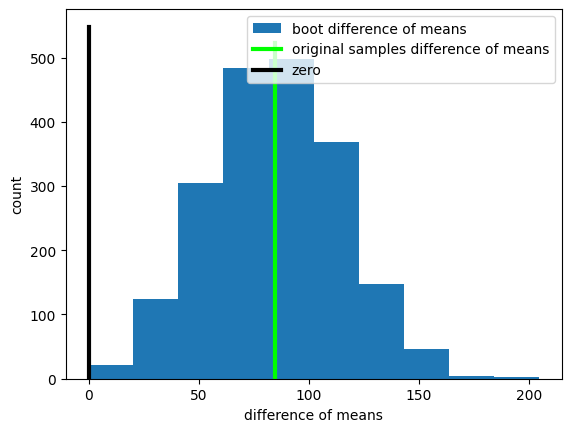

In [ ]:
# boostrap difference of means

boot_samples_diff_means = boot_samples1_means-boot_samples2_means

orig_diff_mean = group1_mean-group2_mean

plt.hist(boot_samples_diff_means, label = 'boot difference of means')
plt.plot([orig_diff_mean,orig_diff_mean],plt.gca().get_ylim(), 
         color = 'lime', lw = 3, label = 'original samples difference of means')
plt.plot([0,0],plt.gca().get_ylim(),color = 'black', lw = 3, label = 'zero')
plt.xlabel('difference of means') , plt.ylabel('count')
plt.legend(loc = 'upper right')
plt.show()

95% Confidence Interval = (26.928149545454446 , 141.22487045454525)


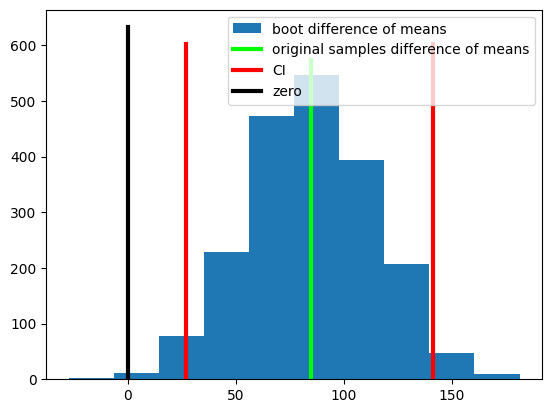

In [ ]:
# confidence interval (CI) 95% 
conf = 0.95
ci95 = np.percentile(boot_samples_diff_means, [100*(1-conf)/2,100*(1-(1-conf)/2)])

print('95% Confidence Interval = (' + str(ci95[0]) + ' , ' + str(ci95[1]) + ')') 

ax = plt.subplot(1,1,1)
plt.hist(boot_samples_diff_means, label = 'boot difference of means')
plt.plot([orig_diff_mean,orig_diff_mean],plt.gca().get_ylim(), 
         color = 'lime', lw = 3, label = 'original samples difference of means')
plt.plot([ci95,ci95], plt.gca().get_ylim(),color = 'red', lw = 3, label = 'CI')
plt.plot([0,0],plt.gca().get_ylim(),color = 'black', lw = 3, label = 'zero')
handles, labels = ax.get_legend_handles_labels()
handles.pop(3) , labels.pop(3)
plt.legend(handles, labels)
plt.show()

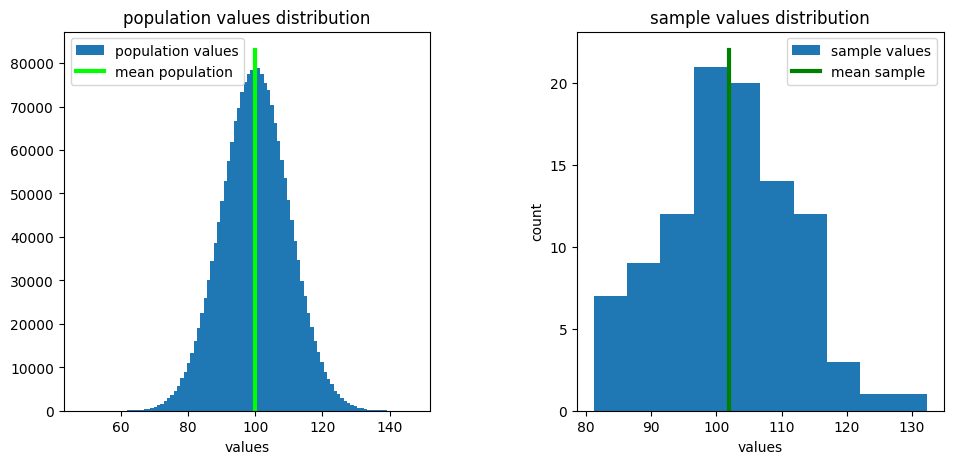

In [46]:
# simulation: confidence interval

population = np.random.normal(100,10,size = (2000000,))
population_mean = population.mean()
population_sd = population.std(ddof=1)

sample_size = 100

sample = np.random.choice(population, size = (sample_size,))
sample_mean = sample.mean()
fig, ax = plt.subplots(1,2)

ax[0].hist(population, bins=100, label = 'population values')
ax[0].plot([population_mean,population_mean],ax[0].get_ylim(), color = 'lime',
         lw = 3, label = 'mean population')
ax[0].set_xlabel('values') , ax[1].set_ylabel('count')
ax[0].set_title('population values distribution')
ax[0].legend()

ax[1].hist(sample, label = 'sample values')
ax[1].plot([sample_mean,sample_mean],ax[1].get_ylim(), color = 'green',
         lw = 3, label = 'mean sample')
ax[1].set_xlabel('values') , ax[1].set_ylabel('count')
ax[1].set_title('sample values distribution')
ax[1].legend()
fig.subplots_adjust( right=1.5, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

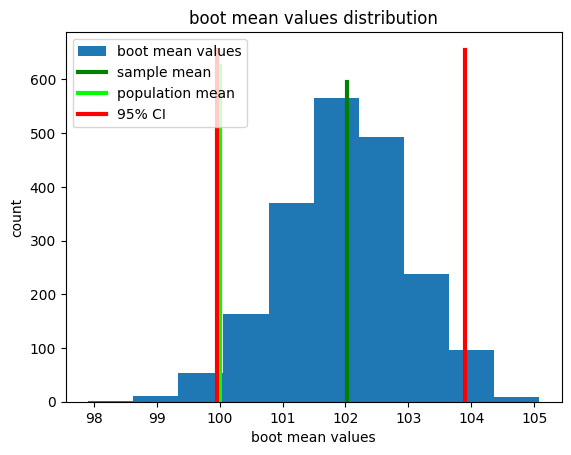

In [47]:
# find CI from sample using regular bootstrap
num_boot = 2000
boot_samples = np.random.choice(sample, size = (sample_size,num_boot))
boot_samples_means = boot_samples.mean(axis = 0)
conf = 0.95
ci_range = np.percentile(boot_samples_means, [100*(1-conf)/2,100*(1-(1-conf)/2)])

plt.hist(boot_samples_means, label = 'boot mean values')
plt.plot([sample_mean,sample_mean],plt.gca().get_ylim(), color = 'green',
         lw = 3, label = 'sample mean')
plt.plot([100,100],plt.gca().get_ylim(), color = 'lime',
         lw = 3, label = 'population mean')
plt.plot([ci_range,ci_range],plt.gca().get_ylim(), color = 'red',
         lw = 3, label = '95% CI')
plt.xlabel('boot mean values') , plt.ylabel('count')
plt.title('boot mean values distribution')
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
handles.pop(3) , labels.pop(3)
plt.legend(handles, labels, loc = 'upper left')
plt.show()

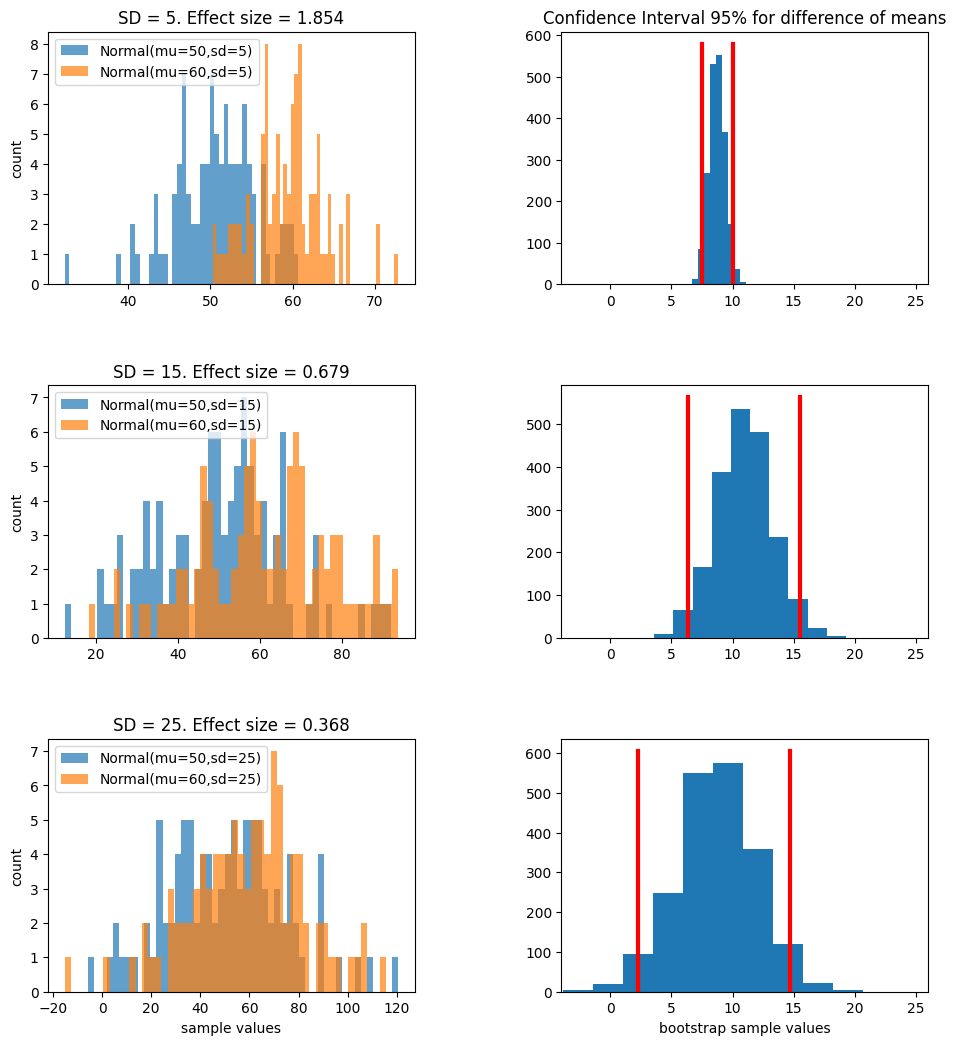

In [52]:
# simulation: influence of spread on effect size

mu1, mu2 = 50, 60
diffSD = [5, 15, 25]
N = 100
boot_num = 2000
conf = 0.95

fig, ax = plt.subplots(3,2)

for i in range(3):
  sample1 = np.random.normal(mu1, diffSD[i], size = (N,))
  sample2 = np.random.normal(mu2, diffSD[i], size = (N,))

  sample1_mean = sample1.mean()
  sample2_mean = sample2.mean()
  sample1_var = sample1.var(ddof=1)
  sample2_var = sample2.var(ddof=1)  

  sd_comb = np.sqrt(((N-1)*sample1_var + (N-1)*sample2_var)/(N+N-2))
  effect_size = (sample2_mean-sample1_mean)/sd_comb

  ax[i,0].hist(sample1, alpha = 0.7, bins = 50,
             label = 'Normal(mu=50,sd=' + str(diffSD[i]) + ')')
  ax[i,0].hist(sample2, alpha = 0.7, bins = 50,
             label = 'Normal(mu=60,sd=' + str(diffSD[i]) + ')')
  ax[i,0].set_ylabel('count')
  ax[i,0].legend(loc = 'upper left')
  ax[i,0]. set_title('SD = ' + str(diffSD[i]) + '. Effect size = ' + 
                   str(round(effect_size,3)))
  
  boot_sample1 = np.random.choice(sample1, size = (N,boot_num))
  boot_sample2 = np.random.choice(sample2, size = (N,boot_num))
  boot_sample1_means = boot_sample1.mean(axis=0)
  boot_sample2_means = boot_sample2.mean(axis=0)
  boot_mean_diff = boot_sample2_means-boot_sample1_means
  ci_mean_diff = np.percentile(boot_mean_diff, [100*(1-conf)/2,100*(1-(1-conf)/2)])

  ax[i,1].hist(boot_mean_diff)
  ax[i,1].plot([ci_mean_diff,ci_mean_diff],ax[i,1].get_ylim(),lw = 3,color = 'red')
  ax[i,1].set_xlim([-4,26])

ax[0,1].set_title('Confidence Interval 95% for difference of means') 
ax[2,0].set_xlabel('sample values') 
ax[2,1].set_xlabel('bootstrap sample values') 
fig.subplots_adjust(bottom=-1.1, right=1.5, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

effect size = 0.8225


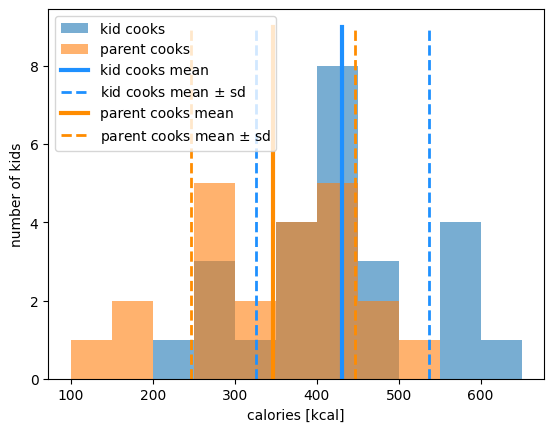

In [ ]:
# effect size

N1, N2 = len(group1), len(group2)
var_group1, var_group2 = group1.var(ddof=1), group2.var(ddof=1)

sd_comb = np.sqrt(  ((N1-1)*var_group1 + (N2-1)*var_group2)/(N1+N2-2) )

effect_size = (group1_mean-group2_mean)/sd_comb

print('effect size = ' + str(round(effect_size,4)))

bin_edges = np.arange(100,700,50)
plt.hist(group1,bins = bin_edges, alpha = 0.6, label = 'kid cooks')
plt.hist(group2, bins = bin_edges, alpha = 0.6, label = 'parent cooks')
plt.plot([group1_mean,group1_mean],[0,9],color = 'dodgerblue', 
         lw = 3, label = 'kid cooks mean')
plt.plot([group1_mean-group1.std(ddof=1),group1_mean-group1.std(ddof=1)],[0,9],color = 'dodgerblue', 
         linestyle = 'dashed', lw = 2, label = 'kid cooks mean $\pm$ sd')
plt.plot([group1_mean+group1.std(ddof=1),group1_mean+group1.std(ddof=1)],[0,9],color = 'dodgerblue', 
         linestyle = 'dashed', lw = 2)
plt.plot([group2_mean,group2_mean],[0,9],color = 'darkorange', 
         lw=3,  label = 'parent cooks mean')
plt.plot([group2_mean-group2.std(ddof=1),group2_mean-group2.std(ddof=1)],[0,9],color = 'darkorange', 
         linestyle = 'dashed', lw = 2, label = 'parent cooks mean $\pm$ sd')
plt.plot([group2_mean+group2.std(ddof=1),group2_mean+group2.std(ddof=1)],[0,9],color = 'darkorange', 
         linestyle = 'dashed', lw = 2)
plt.xlabel('calories [kcal]'), plt.ylabel('number of kids')
plt.legend(loc = 'upper left')
plt.show()


In [ ]:
# hypothesis test
# calculate p=value and compare to alpha error


alpha_error = 0.05
num_extreme = sum(boot_samples_diff_means <= 0)
p_value = num_extreme/num_boot
print('p-value = ' + str(round(p_value, 4)))
print('p_value<alpha_error? ', p_value<alpha_error)


p-value = 0.002
p_value<alpha_error?  True


In [ ]:
# load example dataset
url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/AudioVisual.csv'
data = pd.read_csv(url)

print(data)


    Meas Subject  ResponseTime  Stimulus        Group
0      1      s1        226.27  auditory  NonMusician
1      2      s2        187.52  auditory  NonMusician
2      3      s3        279.77  auditory  NonMusician
3      4      s4        233.83  auditory  NonMusician
4      5      s5        180.83  auditory  NonMusician
..   ...     ...           ...       ...          ...
67    68     s32        239.00    visual     Musician
68    69     s33        194.93    visual     Musician
69    70     s34        224.60    visual     Musician
70    71     s35        240.93    visual     Musician
71    72     s36        234.95    visual     Musician

[72 rows x 5 columns]


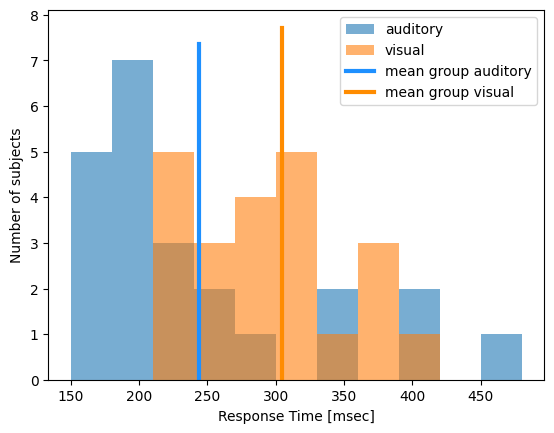

In [ ]:
# extract 2 groups - auditory nonmusicians and visual nonmusicians

groupA = np.array(data[(data.Stimulus=='auditory') & (data.Group=='NonMusician')].ResponseTime)
groupV = np.array(data[(data.Stimulus=='visual') & (data.Group=='NonMusician')].ResponseTime)
groupA_mean = groupA.mean()
groupV_mean = groupV.mean()

bin_edges = np.arange(150,500,30)
plt.hist(groupA, bins = bin_edges, alpha = 0.6, label = 'auditory')
plt.hist(groupV, bins = bin_edges, alpha = 0.6, label = 'visual')
plt.plot([groupA_mean,groupA_mean], plt.gca().get_ylim(), color = 'dodgerblue',
         lw=3, label = 'mean group auditory')
plt.plot([groupV_mean,groupV_mean], plt.gca().get_ylim(), color = 'darkorange',
                  lw=3, label = 'mean group visual')
plt.legend(loc = 'upper right')
plt.xlabel('Response Time [msec]')
plt.ylabel('Number of subjects')
plt.show()



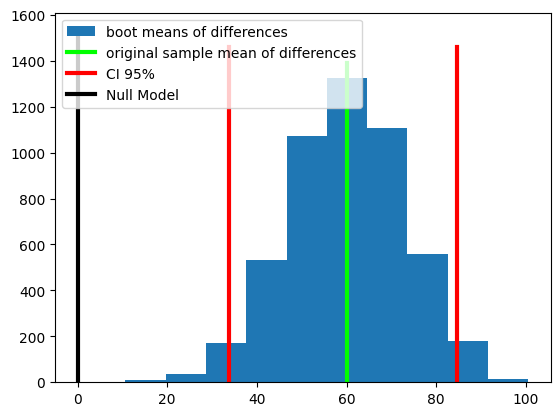

In [ ]:
# non parametric bootstrap paired

boot_num = 5000
N = len(groupA)
conf = 0.95

sample_diff = groupV-groupA
sample_diff_mean = sample_diff.mean()

boot_diff = np.random.choice(sample_diff, size = (N , boot_num))
boot_diff_mean = boot_diff.mean(axis=0)
ci_diff_mean = np.percentile(boot_diff_mean, [100*(1-conf)/2,100*(1-(1-conf)/2)])

plt.hist(boot_diff_mean, label = 'boot means of differences')
plt.plot([sample_diff_mean,sample_diff_mean], plt.gca().get_ylim(), color = 'lime',
    lw = 3, label = 'original sample mean of differences')
plt.plot([ci_diff_mean,ci_diff_mean], plt.gca().get_ylim(), color = 'red', lw = 3,
    label = 'CI 95%')
plt.plot([0,0], plt.gca().get_ylim(), color = 'black', lw = 3, label = 'Null Model')
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
handles.pop(3) , labels.pop(3)
plt.legend(handles, labels, loc = 'upper left')
plt.show()


In [ ]:
# find p=value and effect size
alpha_error = 0.05
num_extreme = sum(boot_diff_mean <= 0)
p_value = num_extreme/num_boot
print('p-value = ' + str(round(p_value,4)))
print('p_value<alpha_error? ', p_value<alpha_error)

sd_comb = np.sqrt(  ((N-1)*groupA.var(ddof=1) + (N-1)*groupV.var(ddof=1))/(N+N-2) )

effect_size = (groupV_mean-groupA_mean)/sd_comb

print('effect size = ' + str(round(effect_size,4)))

p-value = 0.0
p_value<alpha_error?  True
effect size = 0.7652


In [ ]:
# load example dataset 2
url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/memory.csv'
data = pd.read_csv(url)

print(data)

     Gingko  Placebo
0         8     10.0
1         4      4.0
2         8     10.0
3         7     10.0
4         8      6.0
..      ...      ...
99        0      NaN
100       8      NaN
101       8      NaN
102       9      NaN
103       4      NaN

[104 rows x 2 columns]


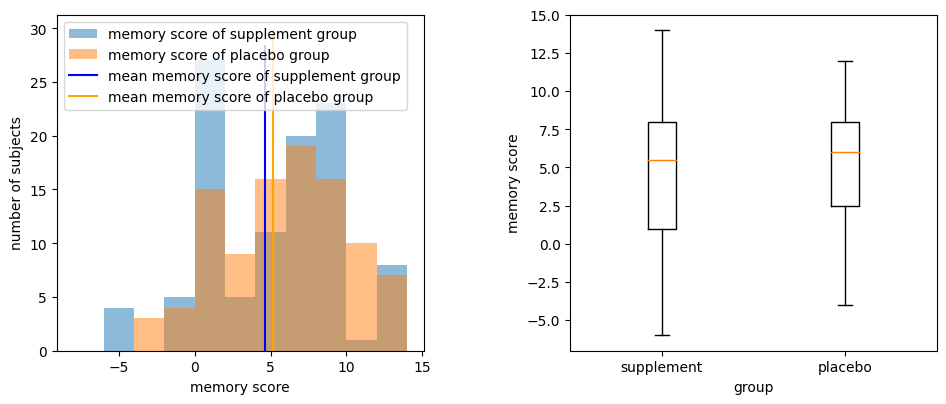

In [ ]:
# present data

supplement = data.Gingko
placebo = data.Placebo
placebo = placebo[np.logical_not(np.isnan(placebo))]

supplement_mean = supplement.mean()
placebo_mean = placebo.mean()

sample_mean_diff = supplement_mean-placebo_mean

fig, ax = plt.subplots(1,2)

bin_edges = np.arange(-8,16,2)
ax[0].hist(supplement, bins = bin_edges, alpha = 0.5, label = 'memory score of supplement group')
ax[0].hist(placebo, bins = bin_edges, alpha = 0.5, label = 'memory score of placebo group')
ax[0].plot([supplement_mean,supplement_mean], ax[0].get_ylim(), color = 'blue', label = 'mean memory score of supplement group')
ax[0].plot([placebo_mean,placebo_mean], ax[0].get_ylim(), color = 'orange', label = 'mean memory score of placebo group')
ax[0].set_xlabel('memory score')
ax[0].set_ylabel('number of subjects')
ax[0].legend(loc='upper left')

ax[1].boxplot([supplement, placebo], positions = (1,2))
ax[1].set_xticks((1,2), ['supplement','placebo'])
ax[1].set_xlabel('group')
ax[1].set_ylabel('memory score')
fig.subplots_adjust(bottom=0.2, right=1.5, top=0.9, wspace=0.4, hspace=0.4)
plt.show()


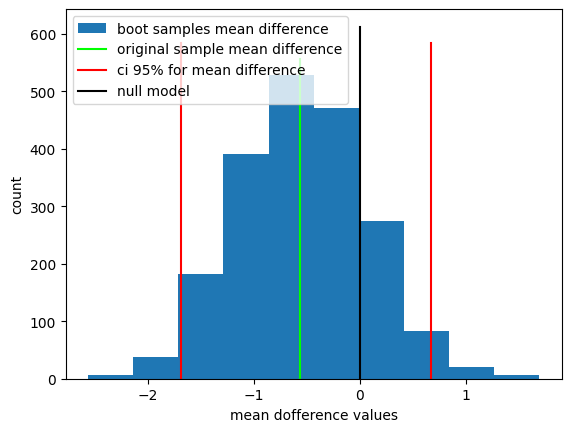

In [ ]:
# bootstrap non parametric non paired

N1 = len(supplement)
N2 = len(placebo)

num_boot = 2000
boot_supplement = np.random.choice(supplement, size = (N1,num_boot))
boot_placebo = np.random.choice(placebo, size = (N2,num_boot))

boot_supplement_mean = boot_supplement.mean(axis=0)
boot_placebo_mean = boot_placebo.mean(axis=0)
boot_mean_diff = boot_supplement_mean-boot_placebo_mean

ci_95 = np.percentile(boot_mean_diff, [100*(1-conf)/2,100*(1-(1-conf)/2)])

plt.hist(boot_mean_diff, label = 'boot samples mean difference')
ax = plt.gca()
plt.plot([sample_mean_diff,sample_mean_diff], ax.get_ylim(), color = 'lime', label = 'original sample mean difference')
plt.plot([ci_95,ci_95], ax.get_ylim(), color = 'red', label = 'ci 95% for mean difference')
plt.plot([0,0], ax.get_ylim(), color = 'black', label = 'null model')
plt.xlabel('mean dofference values')
plt.ylabel('count')
handles, labels = ax.get_legend_handles_labels()
handles.pop(3) , labels.pop(3)
plt.legend(handles, labels, loc = 'upper left')
plt.show()

In [ ]:
# find p=value and effect size
alpha_error = 0.05
num_extreme = sum(boot_mean_diff >= 0)
p_value = num_extreme/num_boot
print('p-value = ' + str(round(p_value,4)))
print('p_value<alpha_error? ', p_value<alpha_error)

sd_comb = np.sqrt(  ((N1-1)*supplement.var(ddof=1) + (N2-1)*placebo.var(ddof=1))/(N1+N2-2) )

effect_size = (supplement_mean-placebo_mean)/sd_comb

print('effect size = ' + str(round(effect_size,4)))

p-value = 0.186
p_value<alpha_error?  False
effect size = -0.131
